In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

In [3]:
fields = ['episode', 'reward', 'ep_block_prob', 'ep_accepted_requests', 'avg_deployment_cost',
        'avg_total_latency', 'avg_access_latency', 'avg_proc_latency',
        'avg_throuput_in', 'avg_packetsize_in', 'avg_interarrival_in', 
        'avg_throuput_out','avg_packetsize_out','avg_interarrival_out',
        'avg_qoe','gini', 'execution_time']

## Copare mean during training and testing

In [6]:
import os
import re
import pandas as pd

# Directory paths for training and testing logs
train_dir = './run_metrics'
test_dir = './run_metrics_test'

# Metric columns to calculate means
metric_columns = ['avg_qoe', 'gini', 'avg_total_latency', 'avg_deployment_cost', 'ep_accepted_requests']

# Listing training and testing files
train_files = set(sorted([f for f in os.listdir(train_dir) if f.endswith('.csv')]))
test_files = set(sorted([f for f in os.listdir(test_dir) if f.endswith('.csv')]))
names = list(train_files.intersection(test_files))

# Pattern to extract variables from the filename
pattern = r"(?P<alg>.+)_env_(?P<env_name>.+)_qoe_(?P<qoe_included>.+)_obj_(?P<obj_included>.+)_cw_(?P<cost_weight>.+)_qw_(?P<qoe_weight>.+)_lw_(?P<latency_weight>.+)_gw_(?P<gini_weight>.+)_sim_(?P<qoe_simulation_mode>.+)_acc_(?P<qoe_accuracy>.+)"

# List to hold all results
results = []

for file_name in names:
    # Match the pattern against the file name
    name = file_name.replace('.csv.csv', '')
    match = re.match(pattern, name)
    
    if match:
        # Extract variables
        variables = match.groupdict()
        train_file = os.path.join(train_dir, file_name)
        test_file = os.path.join(test_dir, file_name)
        
        # Load training and testing data
        df_train = pd.read_csv(train_file, on_bad_lines='skip')
        df_test = pd.read_csv(test_file, on_bad_lines='skip')
    
        # Calculate means for metrics
        train_means = df_train[metric_columns].mean()
        test_means = df_test[metric_columns].mean()
        
        # Convert means to dictionaries and add prefixes to keys
        train_dic = {f"train_{k}": v for k, v in train_means.to_dict().items()}
        test_dic = {f"test_{k}": v for k, v in test_means.to_dict().items()}
        
        # Combine variables, train, and test dictionaries
        combined_result = {**variables, **train_dic, **test_dic}
        
        # Add the combined result to the results list
        results.append(combined_result)

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)


In [10]:
import os
import re
import pandas as pd

# Directory paths for training and testing logs
train_dir = './run_metrics'
test_dir = './run_metrics_test'

# Metric columns to calculate means
metric_columns = ['avg_qoe', 'gini', 'avg_total_latency', 'avg_deployment_cost', 'ep_accepted_requests']

# Listing training and testing files
train_files = set(sorted([f for f in os.listdir(train_dir) if f.endswith('.csv')]))
test_files = set(sorted([f for f in os.listdir(test_dir) if f.endswith('.csv')]))
names = list(train_files.intersection(test_files))

# Pattern to extract variables from the filename
pattern = r"(?P<alg>.+)_env_(?P<env_name>.+)_qoe_(?P<qoe_included>.+)_obj_(?P<obj_included>.+)_cw_(?P<cost_weight>.+)_qw_(?P<qoe_weight>.+)_lw_(?P<latency_weight>.+)_gw_(?P<gini_weight>.+)_sim_(?P<qoe_simulation_mode>.+)_acc_(?P<qoe_accuracy>.+)"

# List to hold all results
results = []

for file_name in names:
    # Match the pattern against the file name
    name = file_name.replace('.csv.csv', '')
    match = re.match(pattern, name)
    
    if match:
        # Extract variables
        variables = match.groupdict()
        train_file = os.path.join(train_dir, file_name)
        test_file = os.path.join(test_dir, file_name)
        
        # Load training and testing data
        df_train = pd.read_csv(train_file, on_bad_lines='skip')
        df_test = pd.read_csv(test_file, on_bad_lines='skip')
    
        # Calculate means for metrics
        train_means = df_train[metric_columns]
        test_means = df_test[metric_columns]

        # Convert means to dictionaries and add prefixes to keys
        train_dic = {f"train_{k}": np.asanyarray(list(v.values()))[:100] for k, v in train_means.to_dict().items()}
        test_dic = {f"test_{k}": np.asanyarray(list(v.values()))[:100] for k, v in test_means.to_dict().items()}
        
        # Combine variables, train, and test dictionaries
        combined_result = {**variables, **train_dic, **test_dic}
        
        # Add the combined result to the results list
        results.append(combined_result)

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)


In [12]:
results_df

,alg,env_name,qoe_included,obj_included,cost_weight,qoe_weight,latency_weight,gini_weight,qoe_simulation_mode,qoe_accuracy,train_avg_qoe,train_gini,train_avg_total_latency,train_avg_deployment_cost,train_ep_accepted_requests,test_avg_qoe,test_gini,test_avg_total_latency,test_avg_deployment_cost,test_ep_accepted_requests
0,mask_ppo,nne,True,False,0.0,0.0,1.0,0.0,Simulation,0.8,"[7.16, 8.24, 7.24, 6.65, 8.1, 7.86, 7.88, 8.57...","[0.23, 0.06, 0.06, 0.27, 0.17, 0.1, 0.2, 0.04,...","[32.58, 27.31, 26.36, 33.88, 27.76, 27.3, 25.5...","[11.59, 19.15, 11.29, 21.2, 30.05, 19.95, 9.24...","[87, 85, 84, 82, 73, 79, 75, 75, 79, 73, 81, 7...","[8.68, 7.19, 5.96, 9.37, 7.45, 9.66, 8.18, 7.5...","[0.36, 0.2, 0.3, 0.24, 0.23, 0.31, 0.14, 0.22,...","[43.09, 35.3, 40.72, 36.12, 34.74, 40.63, 34.4...","[9.64, 24.32, 25.37, 15.28, 8.42, 28.45, 22.4,...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
1,mask_ppo,nne,True,True,0.0,1.0,0.0,0.0,Simulation,0.9,"[6.88, 8.52, 6.34, 7.4, 7.21, 6.9, 7.48, 7.25,...","[0.17, 0.06, 0.12, 0.2, 0.11, 0.11, 0.16, 0.13...","[26.12, 26.55, 25.66, 29.26, 27.78, 27.22, 24....","[10.92, 23.16, 9.47, 25.85, 22.99, 23.63, 11.8...","[72, 79, 80, 74, 81, 76, 73, 80, 76, 74, 81, 8...","[9.78, 9.24, 9.87, 6.26, 6.28, 7.69, 7.53, 6.3...","[0.55, 0.38, 0.44, 0.57, 0.59, 0.49, 0.38, 0.5...","[63.06, 43.41, 47.68, 69.96, 71.71, 52.52, 45....","[12.82, 22.16, 17.14, 49.86, 26.36, 19.66, 16....","[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
2,mask_ppo,nne,True,True,0.0,1.0,0.0,0.0,Simulation,0.8,"[8.69, 8.52, 8.18, 7.03, 7.47, 7.56, 8.88, 8.1...","[0.12, 0.07, 0.21, 0.2, 0.11, 0.02, 0.13, 0.12...","[26.78, 28.64, 29.23, 29.06, 26.04, 25.39, 23....","[10.62, 24.07, 12.26, 27.96, 31.37, 20.48, 12....","[78, 87, 84, 73, 70, 75, 72, 81, 74, 86, 86, 8...","[7.1, 7.56, 9.64, 5.77, 7.36, 8.63, 9.78, 5.65...","[0.38, 0.7, 0.73, 0.72, 0.75, 0.34, 0.74, 0.75...","[40.81, 95.28, 105.02, 94.88, 103.5, 40.02, 10...","[4.54, 18.12, 62.56, 2.32, 4.0, 21.64, 62.88, ...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
3,mask_ppo,nne,True,True,1.0,0.0,0.0,0.0,Simulation,0.9,"[8.7, 8.93, 7.68, 7.65, 6.41, 8.86, 7.3, 8.08,...","[0.08, 0.08, 0.18, 0.12, 0.09, 0.08, 0.14, 0.0...","[26.14, 28.36, 26.59, 26.92, 28.99, 26.9, 26.0...","[9.55, 20.91, 10.85, 24.83, 29.25, 25.3, 12.2,...","[80, 88, 78, 72, 83, 77, 79, 83, 83, 81, 84, 7...","[9.04, 6.64, 7.81, 5.55, 7.72, 8.17, 7.67, 5.8...","[0.55, 0.52, 0.52, 0.72, 0.73, 0.46, 0.22, 0.6...","[54.72, 54.41, 60.17, 89.55, 95.92, 47.75, 36....","[3.7, 5.06, 11.57, 2.14, 4.16, 6.16, 14.16, 14...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
4,mask_ppo,nne,True,False,0.0,0.0,1.0,0.0,Simulation,1.0,"[5.47, 8.99, 7.09, 7.55, 8.52, 7.76, 7.64, 6.8...","[0.19, 0.11, 0.21, 0.08, 0.1, 0.06, 0.12, 0.09...","[26.08, 27.01, 28.05, 29.31, 28.87, 28.12, 24....","[9.79, 20.32, 15.37, 24.96, 30.59, 18.65, 10.4...","[72, 80, 76, 84, 81, 86, 75, 75, 83, 81, 76, 8...","[8.24, 8.31, 8.23, 8.71, 7.56, 7.75, 5.49, 6.6...","[0.18, 0.12, 0.15, 0.2, 0.13, 0.32, 0.23, 0.16...","[34.07, 32.0, 34.74, 34.73, 32.17, 39.8, 38.26...","[11.08, 16.88, 30.33, 23.92, 13.8, 15.82, 19.3...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,mask_ppo,nne,True,True,0.0,0.5,0.5,0.0,Simulation,0.9,"[7.64, 6.02, 5.6, 9.6, 8.74, 8.07, 7.63, 6.71,...","[0.14, 0.06, 0.09, 0.16, 0.16, 0.07, 0.17, 0.0...","[25.69, 26.49, 24.82, 30.79, 28.45, 28.98, 27....","[10.46, 19.44, 9.24, 29.61, 26.49, 22.39, 11.6...","[72, 82, 79, 82, 77, 87, 79, 80, 83, 77, 82, 7...","[9.54, 7.96, 9.18, 9.11, 5.26, 7.18, 7.33, 7.0...","[0.34, 0.22, 0.28, 0.26, 0.29, 0.21, 0.21, 0.1...","[41.26, 37.18, 43.3, 37.8, 37.29, 34.35, 37.02...","[12.43, 18.62, 40.08, 28.88, 11.32, 17.56, 30....","[100, 100, 100, 100, 100, 100, 100, 100, 100, ..."
117,mask_ppo,nne,True,True,0.0,0.0,0.5,0.5,Real,0.0,"[6.67, 6.44, 7.17, 8.67, 7.64, 7.21, 7.76, 7.2...","[0.19, 0.07, 0.08, 0.16, 0.14

In [14]:
results_df.to_pickle('results_without_latency_unbalanced_qoe.pkl')

In [7]:
df = results_df

# Analysing The Results

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Focus on columns of interest for analysis
columns_of_interest = [
    'cost_weight', 'qoe_weight', 'qoe_included',
    'train_avg_qoe', 'test_avg_qoe',
    'train_avg_deployment_cost', 'test_avg_deployment_cost',
]

In [11]:
df = df.astype({'cost_weight': 'float64', 'qoe_weight': 'float64', 'latency_weight': 'float64', 'gini_weight': 'float64'})

In [12]:
# Ensure that only the relevant columns are selected for plotting
df_subset = df[columns_of_interest]

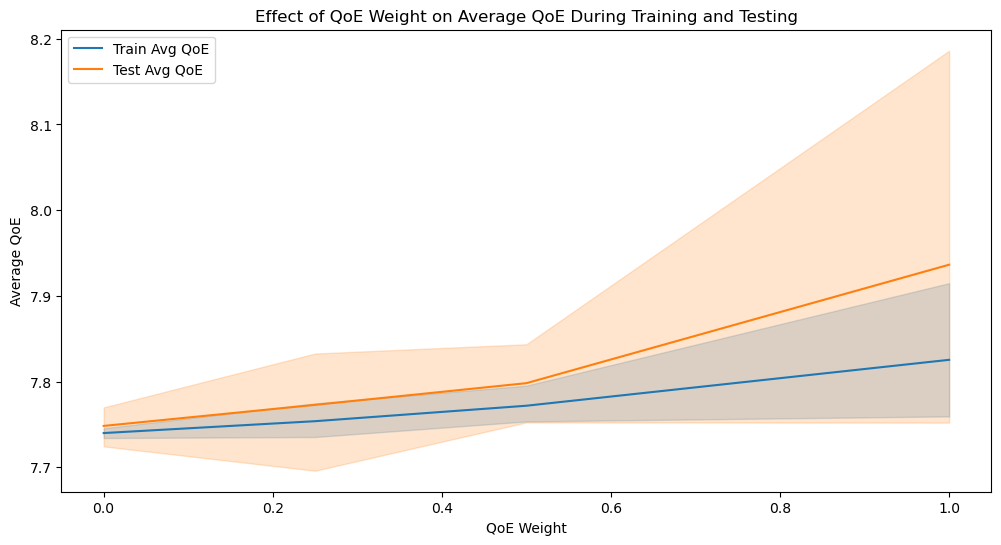

In [13]:
# Analyze the effect of 'qoe_weight' on 'train_avg_qoe' and 'test_avg_qoe'
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='qoe_weight', y='train_avg_qoe', label='Train Avg QoE')
sns.lineplot(data=df, x='qoe_weight', y='test_avg_qoe', label='Test Avg QoE')
plt.title('Effect of QoE Weight on Average QoE During Training and Testing')
plt.xlabel('QoE Weight')
plt.ylabel('Average QoE')
plt.legend()
plt.show()

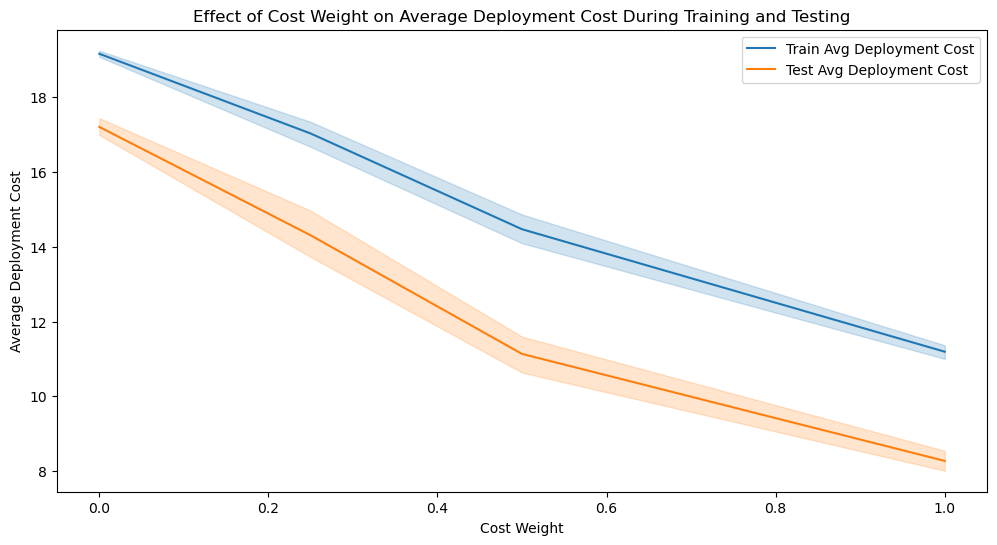

In [14]:
# Analyze the effect of 'cost_weight' on 'train_avg_deployment_cost' and 'test_avg_deployment_cost'
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='cost_weight', y='train_avg_deployment_cost', label='Train Avg Deployment Cost')
sns.lineplot(data=df, x='cost_weight', y='test_avg_deployment_cost', label='Test Avg Deployment Cost')
plt.title('Effect of Cost Weight on Average Deployment Cost During Training and Testing')
plt.xlabel('Cost Weight')
plt.ylabel('Average Deployment Cost')
plt.legend()
plt.show()

In [ ]:
# Analyze the presence of 'qoe_included' on 'train_avg_qoe' and 'test_avg_qoe'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='qoe_included', y='train_avg_qoe', showmeans=True)
sns.boxplot(data=df, x='qoe_included', y='test_avg_qoe', showmeans=True)
plt.title('Effect of QoE Inclusion on Average QoE During Training and Testing')
plt.xlabel('QoE Included (True/False)')
plt.ylabel('Average QoE')
plt.show()

# Analyze the presence of 'qoe_included' on 'train_avg_qoe' and 'test_avg_qoe'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='obj_included', y='train_avg_qoe', showmeans=True)
sns.boxplot(data=df, x='obj_included', y='test_avg_qoe', showmeans=True)
plt.title('Effect of QoE Inclusion on Average QoE During Training and Testing')
plt.xlabel('QoE Included (True/False)')
plt.ylabel('Average QoE')
plt.show()

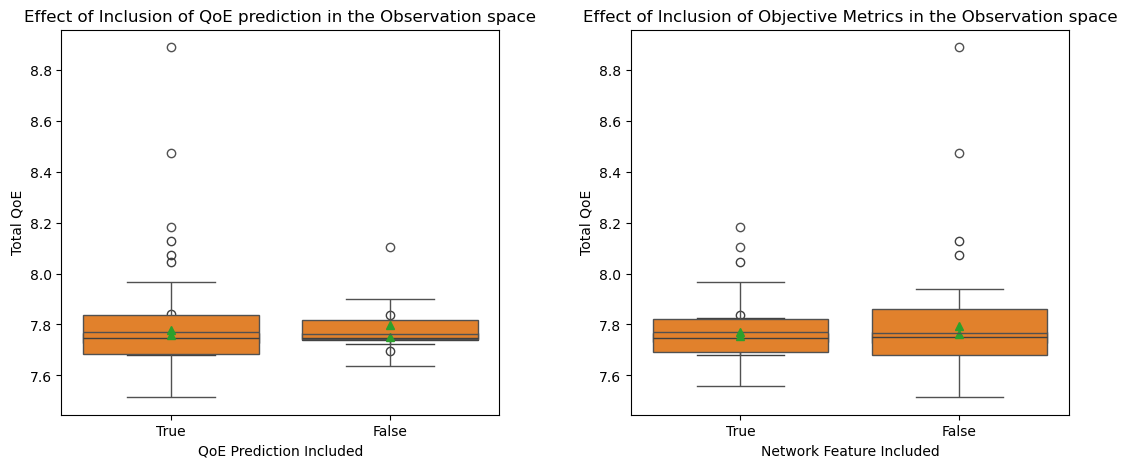

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between subplots

# Subplot 1: Train vs Test Average QoE
sns.boxplot(data=df, x='qoe_included', y='train_avg_qoe', showmeans=True, ax=axs[0])
sns.boxplot(data=df, x='qoe_included', y='test_avg_qoe', showmeans=True, ax=axs[0])
axs[0].set_title('Effect of Inclusion of QoE prediction in the Observation space')
axs[0].set_xlabel('QoE Prediction Included')
axs[0].set_ylabel('Total QoE')
# Subplot 2: Train vs Test Total Latency
sns.boxplot(data=df, x='obj_included', y='train_avg_qoe', showmeans=True, ax=axs[1])
sns.boxplot(data=df, x='obj_included', y='test_avg_qoe', showmeans=True, ax=axs[1])
axs[1].set_title('Effect of Inclusion of Objective Metrics in the Observation space')
axs[1].set_xlabel('Network Feature Included')
axs[1].set_ylabel('Total QoE')
# Show the combined figure
plt.savefig('Inclusion_qoe_obj.png')

plt.show()
